<a href="https://colab.research.google.com/github/zananzelo/datasciencecoursera/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv('Advertising.csv')

In [23]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


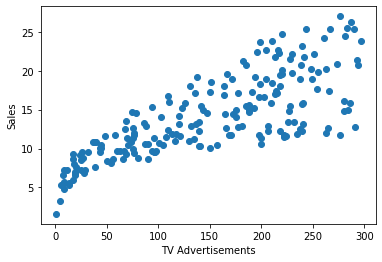

In [25]:
X = data.iloc[:, 1].values
Y = data.iloc[:, 4].values
plt.scatter(X, Y)
plt.xlabel('TV Advertisements')
plt.ylabel('Sales')
plt.show()


In [34]:
m = 0
c = 0

In [35]:
L = 0.00001
epochs = 50

In [36]:
n = float(len(X))

In [39]:
#Assign m and c as 0 initially
m = 0
c = 0


L = 0.00001 #Learning Rate and Iteration
epochs = 50 # The number of iterations to perform gradient descent


n = float(len(X)) # Number of elements in X

# Performing Gradient Descent
for i in range(epochs):
    #Current predicted value of y
    ypred = m*X + c
    
    #Partial derivative of cost function with respect to m and c
    dm = (-2/n) * sum(X * (Y - ypred))
    dc = (-2/n) * sum(Y - ypred)
    
    #Update the current value of m and c
    m = m - L * dm
    c = c - L * dc

#Print m and that has the lowest number of error
print (m, c)

0.08323873042694489 0.0022036485248894387


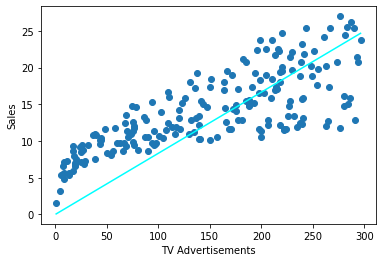

In [41]:
# Making predictions
ypred = m*X + c

#Plot the data with the regression line and predicted value points
plt.scatter(X, Y)
plt.xlabel('TV Advertisements')
plt.ylabel('Sales')
plt.plot([min(X), max(X)], [min(ypred), max(ypred)], color='cyan') #regression line
plt.show()

# **Implementing Linear Regression using sklearn**

In [50]:
#needed libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [53]:
#Create a fitted model
lm1 = smf.ols(formula='Sales ~ TV', data=data).fit()

#Print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [54]:
#Create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

#Instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

#Print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

7.032593549127695
[0.04753664]


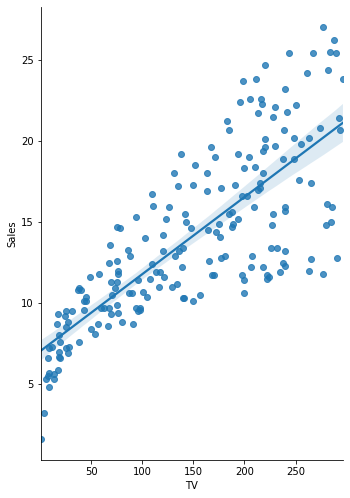

In [56]:
sns.pairplot(data, x_vars=['TV'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

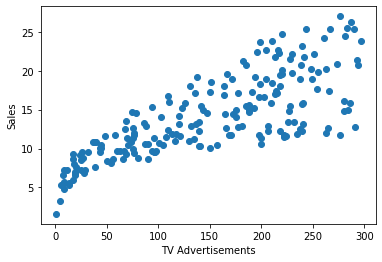

In [57]:
XX = data['TV'] 
YY = data['Sales']
plt.scatter(X, Y)
plt.xlabel('TV Advertisements')
plt.ylabel('Sales')
plt.show()

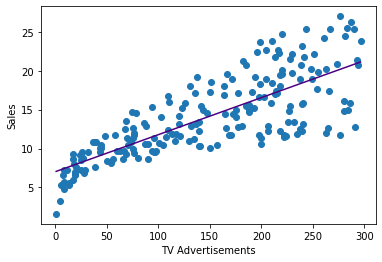

In [59]:
Y_predx = lm2.coef_*XX +  lm2.intercept_
#Y_predx = 0.04753664*XX +  7.032593549127695


plt.scatter(XX, YY)
plt.xlabel('TV Advertisements')
plt.ylabel('Sales')
plt.plot([min(XX), max(XX)], [min(Y_predx), max(Y_predx)], color='indigo')  # regression line
plt.show()